In [13]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [14]:
df = pd.read_csv('Validation error of 301 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,16.593259,-10.125185,9.562460,-11.482258,12.536541,7.815887,102.466694,2.277600e+27,1777.777791,...,-4.093484,-14.838882,-4.093484,2.655528e+27,1597.774506,-10.371383,8.801229e+07,-4.606666,-15.998672,-8.287942
1,0,47.653364,-0.217604,8.280578,-5.907400,-1.410239,6.834922,209.865284,2.024533e+27,1555.555582,...,-16.629781,-5.884384,-2.302585,2.989292e+27,1552.170634,-10.250038,8.332270e+07,-16.395262,-6.286577,-7.134912
2,0,-1.645828,52.475238,107.116020,26.623540,107.162917,19.144283,-46.784776,2.783733e+27,1000.000000,...,-2.302585,-9.466183,-16.629781,2.737918e+27,1524.752378,-4.769022,8.458939e+07,-4.770102,-11.278416,-8.849575
3,0,-8.225481,27.818217,-24.859692,-10.753865,-40.938792,-40.470498,-51.200320,3.036800e+27,1222.222224,...,-7.675284,-9.466183,-16.629781,2.787009e+27,1562.222660,-9.804294,8.388374e+07,-4.533115,-5.635172,-8.115280
4,0,-9.193440,32.246354,-38.528656,-14.997476,-52.102519,-26.826406,179.907990,3.289867e+27,1222.222224,...,-14.838882,-4.093484,-2.302585,2.987415e+27,1616.344333,-3.617210,8.913917e+07,-7.107451,-2.995350,-6.445119


In [15]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,...,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000
mean,0.0,14.020611,6.197413,7.953419,6.855301,0.439524,3.229379,26.863051,2.588028e+27,1529.259268,...,-10.475057,-10.606389,-10.212391,2.741254e+27,1548.975216,-10.071505,8.365607e+07,-9.499281,-10.285571,-8.400899
std,0.0,31.976255,24.321756,28.298577,20.298362,30.934899,23.454875,100.748037,7.044069e+26,317.939912,...,4.764009,5.159216,5.416362,2.000722e+26,43.239854,4.674236,2.560668e+06,3.701237,4.720471,0.915271
min,0.0,-37.920276,-26.318471,-40.156470,-24.523166,-64.179270,-43.349637,-62.472487,1.518400e+27,1000.000000,...,-18.420681,-18.420681,-18.420681,2.130695e+27,1389.707327,-19.063656,7.448239e+07,-18.904052,-18.634972,-11.187042
25%,0.0,-12.431171,-14.841204,-7.937522,-9.344868,-16.744755,-11.242033,-44.100189,2.024533e+27,1222.222224,...,-14.838882,-14.838882,-14.838882,2.620473e+27,1518.404186,-13.929396,8.202111e+07,-12.348355,-15.008716,-9.045930
50%,0.0,7.046296,1.157636,1.228382,2.195417,-4.392103,-2.326846,-13.442779,2.530667e+27,1555.555582,...,-11.257083,-11.257083,-9.466183,2.760238e+27,1543.334246,-9.906178,8.380026e+07,-9.357029,-10.025303,-8.366676
75%,0.0,36.640258,22.899170,12.038285,22.619486,10.482967,10.465160,54.111278,3.036800e+27,1777.777791,...,-7.675284,-5.884384,-5.884384,2.897643e+27,1575.854763,-5.720976,8.537327e+07,-6.456017,-5.933119,-7.753469
max,0.0,100.942406,63.595760,121.796262,52.365528,133.456159,103.915846,354.288483,3.796000e+27,2000.000000,...,-2.302585,-2.302585,-2.302585,3.270241e+27,1695.265412,-2.918346,9.054152e+07,-3.264453,-2.995350,-6.092936


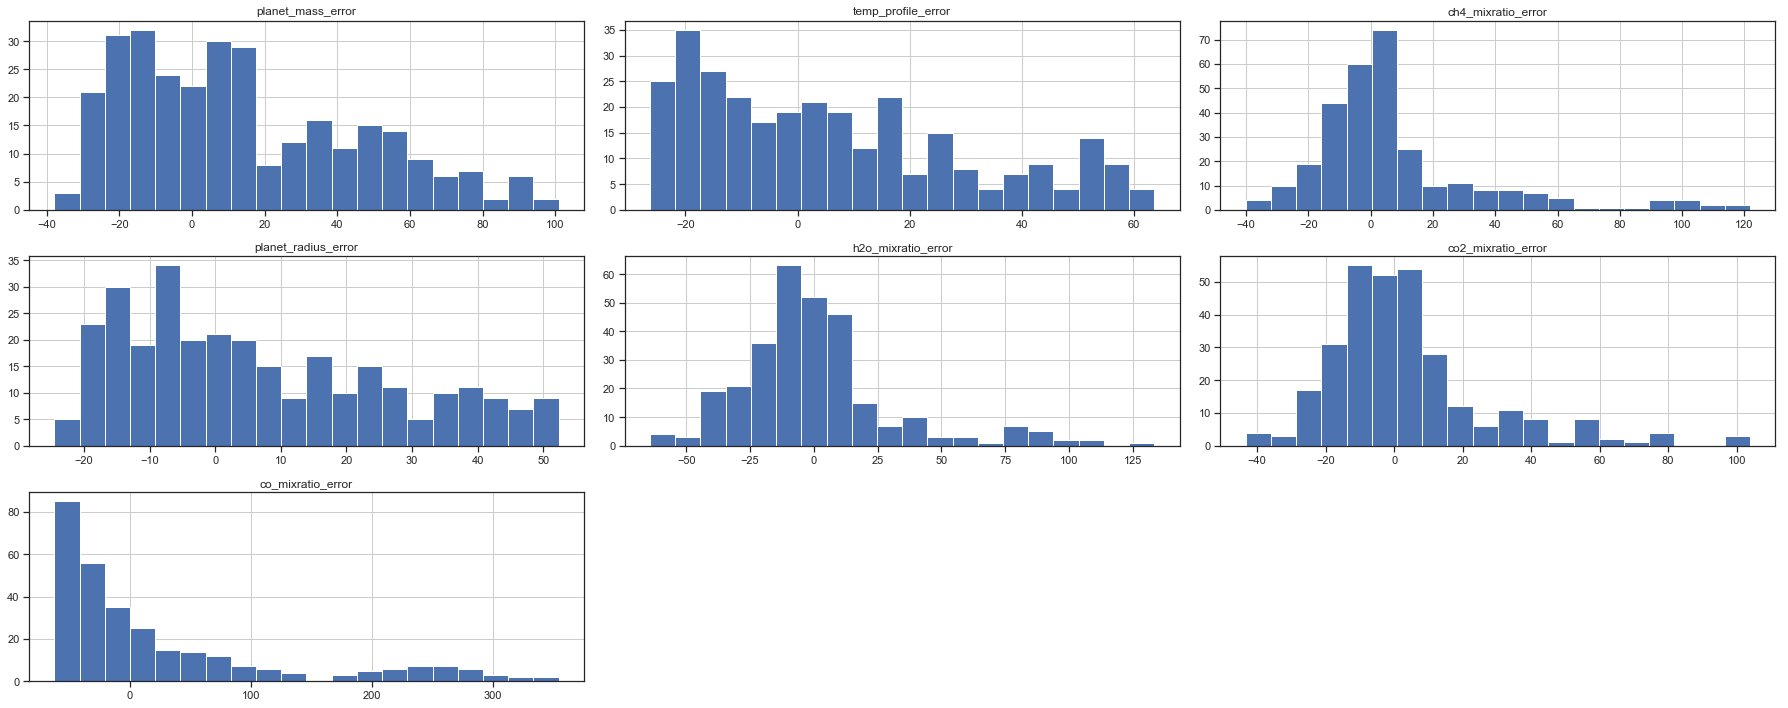

In [16]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

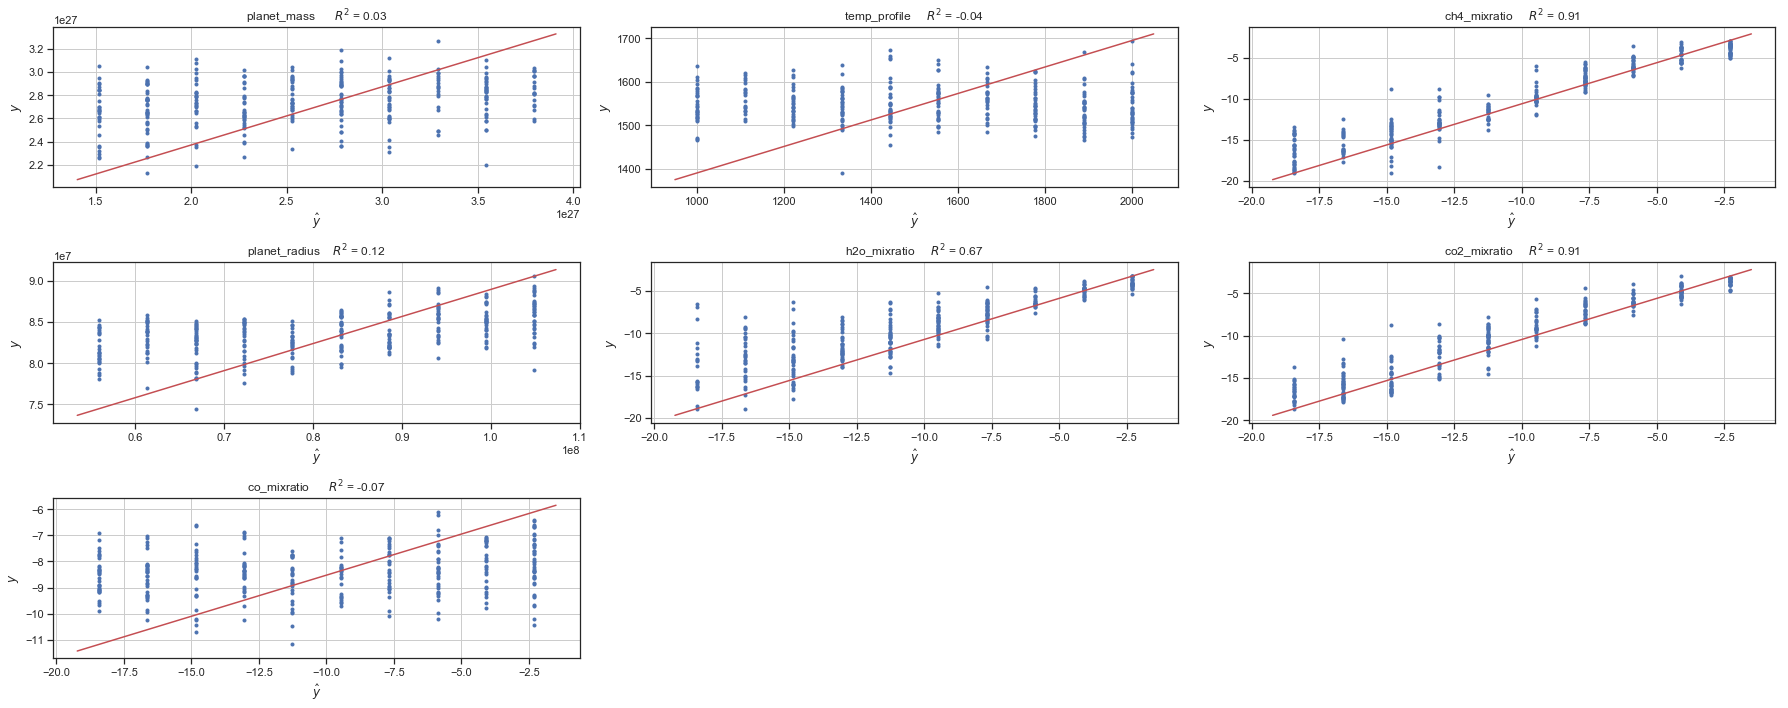

In [18]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    y_hat = df[param+'_real']
    y = df[param+'_inpainted']
    
    r2 = r2_score(y_hat, y)
    
    plt.subplot(3,3,i+1)
    plt.title(param +' \t $R^2$ = %.2f' % r2)
    plt.plot(y_hat, y, '.')
    plt.plot(plt.xlim(), plt.ylim(), ls="-", c='r')
    
    plt.xlabel(r"$\hat{y}$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.tight_layout()